In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
from collections import Counter


exec(open('utils.py').read())
print('Loaded')


def pct_dist(a=None, b=None, mean=None, sd=None):
    if a is not None:
        return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 
    else:
        return sq.lognorm(lognorm_mean=mean, lognorm_sd=sd, lclip=0.001, rclip=1, credibility=80) 


def lab_spend_on_largest_model_this_year(total_investment,
                                         total_revenue,
                                         percent_investment_spent_this_year,
                                         percent_revenue_that_is_profit,
                                         percent_profit_spent_this_year,
                                         percent_spend_on_compute,
                                         percent_compute_on_biggest_model):
    money = total_investment * percent_investment_spent_this_year
    money += total_revenue * percent_revenue_that_is_profit * percent_profit_spent_this_year
    return sq.dist_fn(money * percent_spend_on_compute * percent_compute_on_biggest_model, fn=np.log10)


def bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                             percent_r_and_d_on_ai,
                                             percent_ai_spend_on_compute,
                                             percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)
    

print('Loaded')

Loaded
Loaded


## GPT3 Prediction (for calibration)

## Model predicts GPT-3 spend will be ##
{1: '187 thousand',
 5: '369 thousand',
 10: '535 thousand',
 20: '839 thousand',
 30: '1 million',
 40: '2 million',
 50: '2 million',
 60: '3 million',
 70: '3 million',
 80: '5 million',
 90: '7 million',
 95: '10 million',
 99: '21 million'}
-
## Actual GPT-3 estimated to be ##
{1: '184 thousand',
 5: '325 thousand',
 10: '442 thousand',
 20: '641 thousand',
 30: '837 thousand',
 40: '1 million',
 50: '1 million',
 60: '2 million',
 70: '2 million',
 80: '3 million',
 90: '4 million',
 95: '5 million',
 99: '9 million'}
-
Actual spend on GPT-3 ($1.3M) is at the 34.0th percentile of the model
-


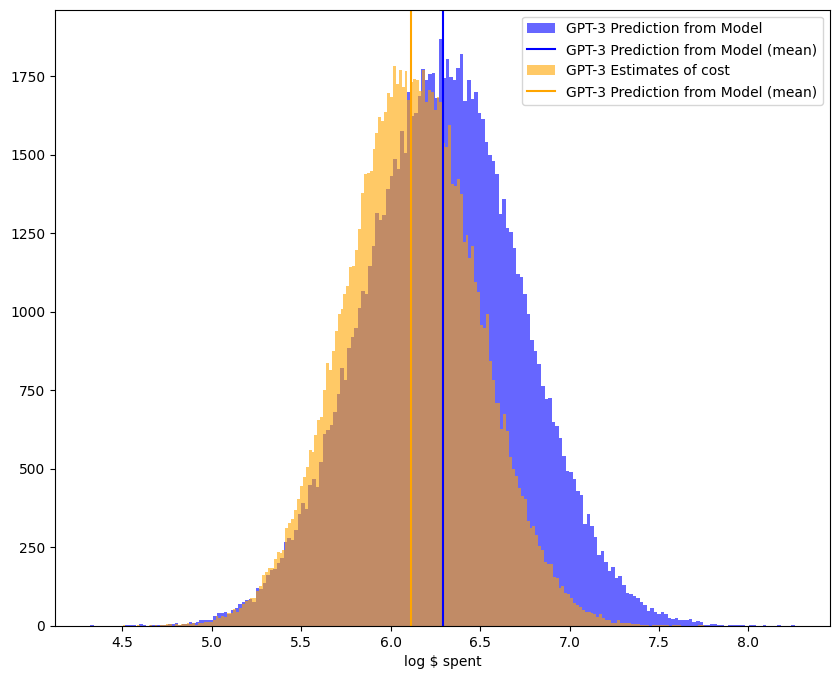

In [2]:
gpt3_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.2),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt3_spend = 1.3*M

plot_model_versus_estimate('GPT-3', samples, actual_gpt3_spend)

## GPT4 Prediction (for calibration)

## Model predicts GPT-4 spend will be ##
{1: '4 million',
 5: '6 million',
 10: '7 million',
 20: '9 million',
 30: '11 million',
 40: '13 million',
 50: '16 million',
 60: '19 million',
 70: '22 million',
 80: '27 million',
 90: '35 million',
 95: '44 million',
 99: '68 million'}
-
## Actual GPT-4 estimated to be ##
{1: '3 million',
 5: '6 million',
 10: '8 million',
 20: '12 million',
 30: '15 million',
 40: '19 million',
 50: '23 million',
 60: '29 million',
 70: '36 million',
 80: '47 million',
 90: '69 million',
 95: '95 million',
 99: '170 million'}
-
Actual spend on GPT-4 ($23.3M) is at the 73.3th percentile of the model
-


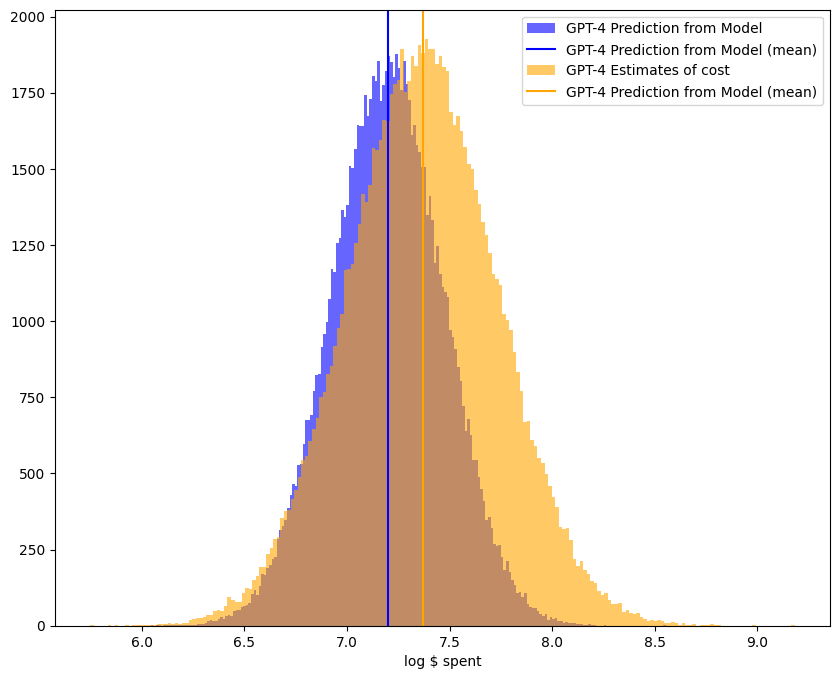

In [3]:
gpt4_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.2, 0.5),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
samples = gpt4_prediction @ (100*K)

# https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt4_spend = 23.3*M

plot_model_versus_estimate('GPT-4', samples, actual_gpt4_spend)

## Gemini Ultra Prediction (for calibration)

## Model predicts Gemini Ultra spend will be ##
{1: '2 million',
 5: '7 million',
 10: '13 million',
 20: '27 million',
 30: '46 million',
 40: '72 million',
 50: '109 million',
 60: '167 million',
 70: '260 million',
 80: '437 million',
 90: '900 million',
 95: '2 billion',
 99: '5 billion'}
-
## Actual Gemini Ultra estimated to be ##
{1: '5 million',
 5: '8 million',
 10: '11 million',
 20: '16 million',
 30: '21 million',
 40: '26 million',
 50: '32 million',
 60: '40 million',
 70: '50 million',
 80: '65 million',
 90: '94 million',
 95: '128 million',
 99: '227 million'}
-
Actual spend on Gemini Ultra ($32.1M) is at the 23.0th percentile of the model
-


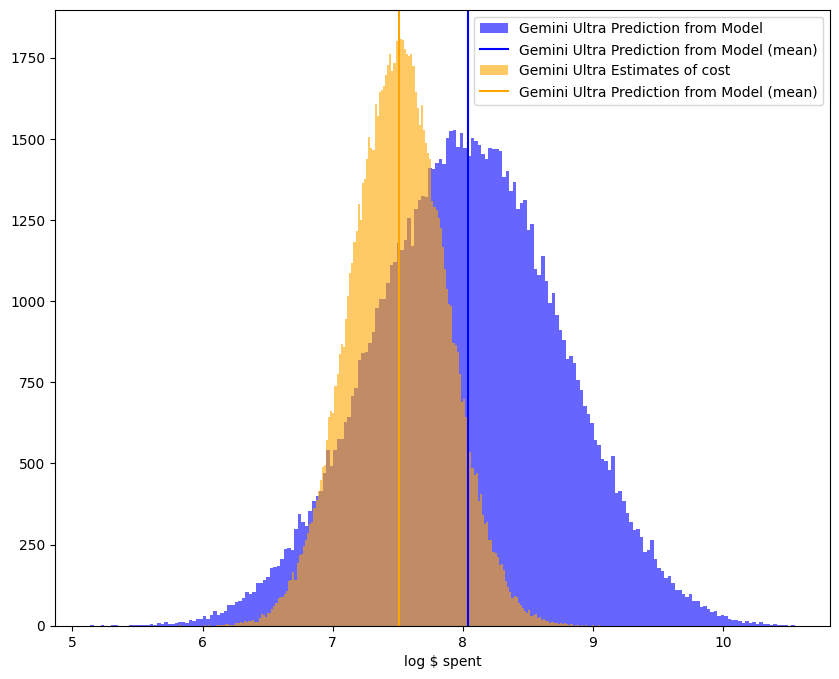

In [4]:
gemini_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 50*B, credibility=80),
                                                             percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                             percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                             percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = gemini_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gemini_spend = 32.1*M

plot_model_versus_estimate('Gemini Ultra', samples, actual_gemini_spend)

## Model for Largest Training Run in 2024

$83 million (80%CI: $26 million to $273 million)
-
{1: '10 million',
 5: '18 million',
 10: '26 million',
 20: '38 million',
 30: '51 million',
 40: '66 million',
 50: '83 million',
 60: '105 million',
 70: '135 million',
 80: '181 million',
 90: '273 million',
 95: '382 million',
 99: '702 million'}
-


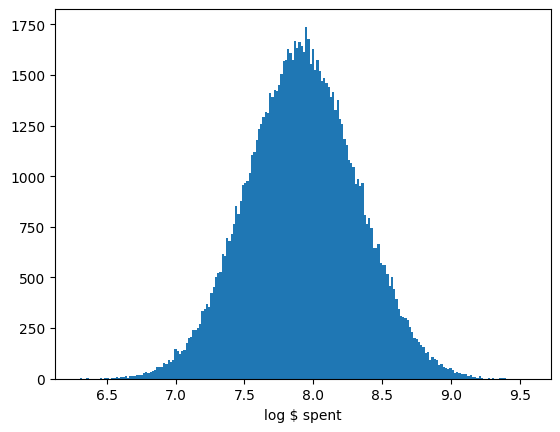

In [30]:
largest_openai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(10*B, 12*B),
                                                                       total_revenue=sq.lognorm(1.3*B, 1.5*B),
                                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                       percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                       percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))

show_model_forecast(largest_openai_model_prediction @ (100*K))

$17 million (80%CI: $5 million to $60 million)
-
{1: '2 million',
 5: '3 million',
 10: '5 million',
 20: '7 million',
 30: '10 million',
 40: '13 million',
 50: '17 million',
 60: '21 million',
 70: '28 million',
 80: '38 million',
 90: '60 million',
 95: '86 million',
 99: '173 million'}
-


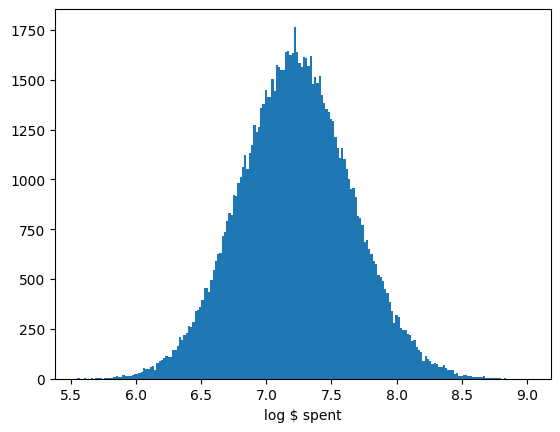

In [20]:
largest_anthropic_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1*B, 5*B, credibility=80),
                                                                          total_revenue=sq.lognorm(0.5*B, 1*B, credibility=80),
                                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                          percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                          percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                          percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                          percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
show_model_forecast(largest_anthropic_model_prediction @ (100*K))

In [21]:
largest_google_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 60*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                                           percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = largest_google_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '3 million',
 5: '8 million',
 10: '14 million',
 20: '30 million',
 30: '50 million',
 40: '79 million',
 50: '120 million',
 60: '184 million',
 70: '289 million',
 80: '485 million',
 90: '997 million',
 95: '2 billion',
 99: '5 billion'}


In [22]:
largest_microsoft_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 40*B, credibility=80),
                                                                              percent_r_and_d_on_ai=pct_dist(0.05, 0.2),
                                                                              percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                              percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = largest_microsoft_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '2 million',
 5: '4 million',
 10: '7 million',
 20: '13 million',
 30: '21 million',
 40: '31 million',
 50: '45 million',
 60: '66 million',
 70: '98 million',
 80: '156 million',
 90: '300 million',
 95: '510 million',
 99: '1 billion'}


In [23]:
largest_fb_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(20*B, 30*B, credibility=80),
                                                                       percent_r_and_d_on_ai=pct_dist(0.01, 0.1),
                                                                       percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(0.005, 0.1))
samples = largest_fb_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '318 thousand',
 5: '832 thousand',
 10: '1 million',
 20: '3 million',
 30: '4 million',
 40: '7 million',
 50: '10 million',
 60: '14 million',
 70: '21 million',
 80: '35 million',
 90: '67 million',
 95: '115 million',
 99: '322 million'}


In [24]:
largest_inflection_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1*B, 2*B, credibility=80),
                                                                           total_revenue=sq.lognorm(10*M, 200*M, credibility=80),
                                                                           percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                           percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                           percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                           percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
samples = largest_inflection_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '1 million',
 5: '2 million',
 10: '3 million',
 20: '4 million',
 30: '6 million',
 40: '7 million',
 50: '9 million',
 60: '11 million',
 70: '14 million',
 80: '19 million',
 90: '28 million',
 95: '39 million',
 99: '70 million'}


In [26]:
largest_mistral_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(500*M, 1*B, credibility=80),
                                                                        total_revenue=0,
                                                                        percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                        percent_revenue_that_is_profit=0,
                                                                        percent_profit_spent_this_year=0,
                                                                        percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                        percent_compute_on_biggest_model=pct_dist(mean=0.2, sd=0.05))
samples = largest_mistral_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '2 million',
 5: '3 million',
 10: '3 million',
 20: '5 million',
 30: '6 million',
 40: '8 million',
 50: '10 million',
 60: '12 million',
 70: '15 million',
 80: '20 million',
 90: '28 million',
 95: '38 million',
 99: '66 million'}


In [28]:
us_gov_prediction = sq.mixture([[0.6, sq.norm(4, 6, credibility=80)],
                                [0.3, sq.norm(6, 8, credibility=80)],
                                [0.1, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(1*B, 10*B, credibility=80),
                                                                               percent_r_and_d_on_ai=1,
                                                                               percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                               percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))]])
samples = us_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))


{1: '2 thousand',
 5: '8 thousand',
 10: '18 thousand',
 20: '46 thousand',
 30: '99 thousand',
 40: '213 thousand',
 50: '487 thousand',
 60: '1 million',
 70: '5 million',
 80: '21 million',
 90: '97 million',
 95: '226 million',
 99: '710 million'}


In [13]:
uk_gov_prediction = sq.mixture([[0.6, sq.norm(7, 9, lclip=8)],
                                [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B, credibility=80),
                                                                               percent_r_and_d_on_ai=1,
                                                                               percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                               percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])
samples = uk_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '31 million',
 5: '100 million',
 10: '100 million',
 20: '100 million',
 30: '100 million',
 40: '131 million',
 50: '205 million',
 60: '328 million',
 70: '554 million',
 80: '1 billion',
 90: '3 billion',
 95: '5 billion',
 99: '18 billion'}


In [14]:
china_gov_prediction = sq.mixture([[0.05, 0],
                                   [0.55, sq.norm(6, 8, lclip=6)],
                                   [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B, credibility=80),
                                                                                  percent_r_and_d_on_ai=1,
                                                                                  percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                  percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])

# Adjust China's "effective US-equivalent" spend by export controls and other things
# china_gov_prediction = sq.dist_max(0, china_gov_prediction - sq.norm(0.1, 0.5, lclip=0.05, rclip=1))

samples = china_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: 1.0,
 5: '1 million',
 10: '2 million',
 20: '4 million',
 30: '9 million',
 40: '16 million',
 50: '33 million',
 60: '86 million',
 70: '283 million',
 80: '800 million',
 90: '2 billion',
 95: '5 billion',
 99: '18 billion'}


In [15]:
uae_gov_prediction = sq.mixture([[0.6, sq.norm(7, 9, lclip=8)],
                                 [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B, credibility=80),
                                                                                percent_r_and_d_on_ai=1,
                                                                                percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])
samples = uk_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '31 million',
 5: '100 million',
 10: '100 million',
 20: '100 million',
 30: '100 million',
 40: '131 million',
 50: '206 million',
 60: '329 million',
 70: '552 million',
 80: '1 billion',
 90: '3 billion',
 95: '5 billion',
 99: '18 billion'}


In [16]:
mixed_model = (largest_openai_model_prediction >>
               sq.dist_max(largest_anthropic_model_prediction) >>
               sq.dist_max(largest_inflection_model_prediction) >>
               sq.dist_max(largest_mistral_model_prediction) >>
               sq.dist_max(largest_google_model_prediction) >>
               sq.dist_max(largest_microsoft_model_prediction) >>
               sq.dist_max(largest_fb_model_prediction) >>
               sq.dist_max(us_gov_prediction) >>
               sq.dist_max(uk_gov_prediction) >>
               sq.dist_max(uae_gov_prediction) >>
               sq.dist_max(china_gov_prediction))
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(mixed_model @ (100*K)).items()]))

{1: '190 million',
 5: '351 million',
 10: '500 million',
 20: '774 million',
 30: '1 billion',
 40: '1 billion',
 50: '2 billion',
 60: '3 billion',
 70: '4 billion',
 80: '5 billion',
 90: '9 billion',
 95: '14 billion',
 99: '35 billion'}


In [17]:
models = [['OpenAI', largest_openai_model_prediction],
          ['Anthropic', largest_anthropic_model_prediction],
          ['Inflection', largest_inflection_model_prediction],
          ['Mistral', largest_mistral_model_prediction],
          ['Google', largest_google_model_prediction],
          ['Microsoft', largest_microsoft_model_prediction],
          ['Meta', largest_fb_model_prediction],
          ['USGov', us_gov_prediction],
          ['UKGov', uk_gov_prediction],
          ['UAEGov', uae_gov_prediction],
          ['ChinaGov', china_gov_prediction]]

labels = [m[0] for m in models]
max_indices = np.argmax([m[1] @ 100_000 for m in models], axis=0)
max_labels = [labels[i] for i in max_indices]
label_counts = Counter(max_labels)
label_percentages = {label: f"{round((count / 100_000) * 100, 1)}%" for label, count in Counter(max_labels).items()}
label_percentages

{'UAEGov': '17.9%',
 'ChinaGov': '14.0%',
 'Google': '15.4%',
 'Meta': '15.4%',
 'UKGov': '17.8%',
 'Microsoft': '15.6%',
 'Anthropic': '2.1%',
 'OpenAI': '0.2%',
 'USGov': '1.4%',
 'Mistral': '0.1%',
 'Inflection': '0.1%'}

## Cache spend model

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 2866381.23it/s]


Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 8.3,
 5: 8.5,
 10: 8.7,
 20: 8.9,
 30: 9.0,
 40: 9.2,
 50: 9.3,
 60: 9.4,
 70: 9.5,
 80: 9.7,
 90: 10.0,
 95: 10.1,
 99: 10.5}


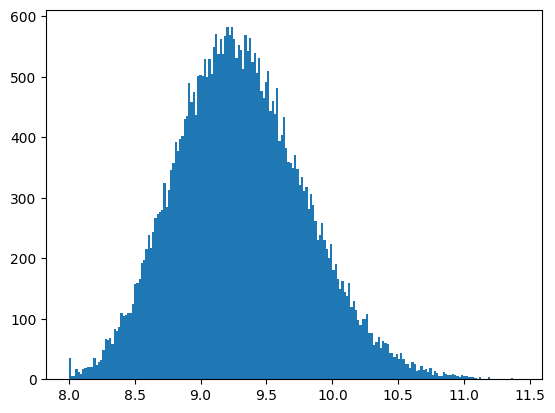

In [18]:
# Output expected willingness to pay for a model in 2024, using log 2022$USD
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

## 2025

$114 million (80%CI: $43 million to $301 million)
-
{1: '19 million',
 5: '32 million',
 10: '43 million',
 20: '60 million',
 30: '76 million',
 40: '94 million',
 50: '114 million',
 60: '138 million',
 70: '169 million',
 80: '215 million',
 90: '301 million',
 95: '395 million',
 99: '669 million'}
-


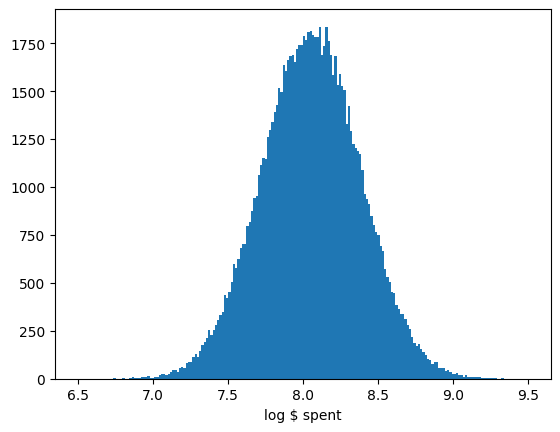

In [29]:
largest_openai_model_prediction_2025 = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(15*B, 30*B),
                                                                            total_revenue=sq.lognorm(1*B, 3*B),
                                                                            percent_investment_spent_this_year=pct_dist(0.05, 0.2),
                                                                            percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                            percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                            percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                            percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))

show_model_forecast(largest_openai_model_prediction_2025 @ (100*K))

In [19]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-12-28 22:49:42.006844
